<a href="https://colab.research.google.com/github/Whatever929/kaggle_notebook/blob/main/Student_Time_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing dataset

In [ ]:
# Dataset can be found in https://www.kaggle.com/xiaowenlimarketing/international-student-time-management

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
%run '/content/drive/MyDrive/Colab Notebooks/setup.ipynb'
%run '/content/drive/MyDrive/Colab Notebooks/plot_util.ipynb'

In [ ]:
connect_kaggle()
os.system("kaggle datasets download -d xiaowenlimarketing/international-student-time-management")
unzip("/content/international-student-time-management.zip")

Saving kaggle.json to kaggle.json
ref                                                              title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
prasertk/healthy-lifestyle-cities-report-2021                    Healthy Lifestyle Cities Report 2021                 2KB  2022-03-03 00:26:02           1777         64  1.0              
piterfm/2022-ukraine-russian-war                                 2022 Ukraine Russia War                            1007B  2022-03-15 11:11:17           1393        115  1.0              
equinxx/spotify-top-50-songs-in-2021                             Spotify top 50 songs in 2021                         4KB  2022-03-09 08:46:59            756         33  1.0              
majyhain/height-of-male-an

In [ ]:
df_question = pd.read_csv("Sheet2.csv")
df_main = pd.read_csv("/content/International students Time management data.csv")

### Overview

Below proceeding, it is good to have a good idea of what the questionnaires are actually measuring. So let's look at the questions being asked.

In [ ]:
pd.set_option("display.max_colwidth", None)
df_question[['Order', 'Questions']]

,Order,Questions
0,NaN,NaN
1,6.0,"You often feel that your life is aimless, with no definite purpose"
2,7.0,You never have trouble organizing the things you have to do?
3,8.0,"Once you've started an activity, you persist at it until you've completed it"
4,9.0,Sometimes you feel that the things you have to do during the day just don't seem to matter
5,10.0,You will plan your activities from day to day.
6,11.0,You tend to leave things to the last minute?
7,12.0,You tend to change rather aimlessly from one activity to another during the day.
8,13.0,You give up the things that you planning to do just because your friend says no.
9,14.0,You think you do enough with your time.


The questionnaire is asking about how participants feel about how well they manage their time. Note that self perception about one's capability in time management may not, although it usually does, reflect one's objective ability in time management. Below are some possible causes of how one's self report may not translate to one's everyday behavior in managing their time:

1. Availability heuristics. One may judge how well they manage their time based on their recent experiences. In other word, recent experiences are given more weightage when a person is evaluating how well he/she manges his/her time. For example, a person who has been organizing his/her schedule well (Question 2) may be more busy recently, thus affecting his/her time organization. With the recent experience of having trouble in time management more readily recalled, he/she may thus be more hesitant to report that he/she agrees with Question 2, even though he/she has no trouble in organizing things before.
2. Social desirability bias. The participant can over-report how well he/she manage his/her time either unconsciously or consciously.

Usually these effects become less severe as the sample sizes increase, especially if all groups are equally likely to be affected by these factors (which we will assume is the case).

Note that with the issues above, one cannot use the questionnaire to reliably measure how different individual manage their time. The group difference can still be assessed though.

In [ ]:
df_main

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance,6,...,8,9,10,11,12,13,14,15,16,17
0,1,31-35,M,Korea,PM,Social Sciences and Humanities,60%~70%,NaN,S0,Disagree,...,Strong Agree,Neither,Agree,Neither,Disagree,Strong Disagree,Strong Agree,Neither,Disagree,Agree
1,2,26-30,M,China,PM,Science and engineering,60%~70%,50%~59%,S3,Strong Agree,...,Neither,Disagree,Agree,Neither,Disagree,Strong Disagree,Neither,Agree,Neither,Disagree
2,3,26-30,M,Kenya,PM,Business,60%~70%,NaN,S0,Disagree,...,Agree,Disagree,Agree,Agree,Disagree,Strong Disagree,Disagree,Strong Agree,Strong Agree,Disagree
3,4,21-25,M,Vietnam,PM,Law/Legal studies,60%~70%,60%~70%,S0,Disagree,...,Agree,Agree,Disagree,Agree,Neither,Neither,Neither,Neither,Disagree,Agree
4,5,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,Neither,...,Neither,Neither,Disagree,Neither,Neither,Neither,Neither,Disagree,Neither,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,121,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,Disagree,...,Agree,Neither,Disagree,Disagree,Neither,Disagree,Disagree,Agree,Neither,Agree
121,122,31-35,F,China,PM,Business,50%~59%,50%~59%,S1,Agree,...,Neither,Agree,Neither,Strong Agree,Agree,Agree,Disagree,Agree,Strong Agree,Agree
122,123,26-30,M,Gongo,PM,Business,>70%,60%~70%,S0,Strong Disagree,...,Neither,Neither,Neither,Neither,Neither,Strong Disagree,Disagree,Strong Agree,Disagree,Neither
123,124,21-25,F,Ukraine,PM,Business,60%~70%,60%~70%,S1,Agree,...,Disagree,Strong Agree,Disagree,Agree,Agree,Strong Disagree,Disagree,Strong Agree,Disagree,Disagree


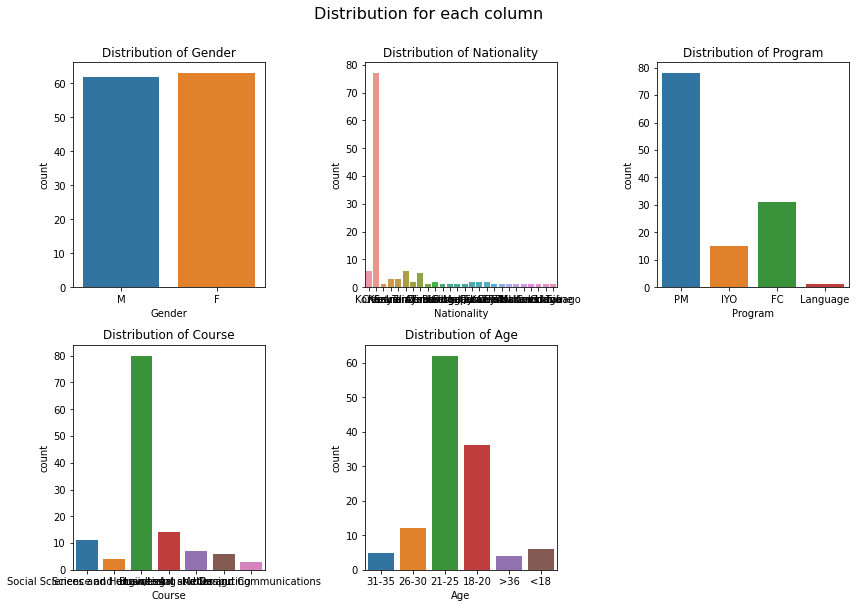

In [ ]:
plot_each_col(data=df_main, col_list=['Gender', 'Nationality', 'Program', 'Course', 'Age'], n_col=3, plot_type='count', figsize=(12, 8), title="Distribution for each column")

In [ ]:
df_main[['Gender', 'Nationality', 'Program', 'Course', 'Age', 'English', 'Attendance']].apply(lambda x: x.value_counts()).unstack().dropna()

Gender       F                                 63.0
             M                                 62.0
Nationality  China                             77.0
             Colombia                           1.0
             Georgia                            1.0
             Gongo                              1.0
             India                              3.0
             Indonesia                          1.0
             Jordan                             1.0
             Kenya                              1.0
             Korea                              6.0
             Kuwait                             2.0
             Malaysia                           1.0
             OCEAN                              1.0
             Oman                               5.0
             Pakistan                           1.0
             Portugal                           1.0
             Qatar                              2.0
             Saudi Arabia                       6.0
            

We see some imbalance distributions in some of the attributes (such as Nationality and Course). A few things to consider here are:

- Is this distribution representative of the population you are measuring? Here, we have no information about what population this samples are supposed to represent, thus we cannot answer this question.
- We may not be able to compare sparse categories meaningfully. Categories with small sample sizes are more vulnerable to outliers, differences in scores between sparse categories group could be due to chances.

### Cleaning

In [ ]:
QUESTION_COL = [str(i) for i in range(6, 18)]
INFO_COL = ['Gender', 'Nationality', 'Program', 'Course', 'Age', 'English', 'Academic', 'Attendance']

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Number       125 non-null    int64 
 1   Age          125 non-null    object
 2   Gender       125 non-null    object
 3   Nationality  125 non-null    object
 4   Program      125 non-null    object
 5   Course       125 non-null    object
 6   English      119 non-null    object
 7   Academic     103 non-null    object
 8   Attendance   119 non-null    object
 9   6            123 non-null    object
 10  7            125 non-null    object
 11  8            121 non-null    object
 12  9            118 non-null    object
 13  10           124 non-null    object
 14  11           123 non-null    object
 15  12           122 non-null    object
 16  13           125 non-null    object
 17  14           124 non-null    object
 18  15           125 non-null    object
 19  16           123 non-null    

NaN response will be filled with value 'Neither'

In [ ]:
df_main[QUESTION_COL] = df_main[QUESTION_COL].fillna('Neither')

In [ ]:
df_transformed = df_main.copy()
df_score = df_main.copy() # Map answer to score

In [ ]:
scale_a = {"Strong Agree": 5, "Agree": 4, "Neither": 3, "Disagree": 2, "Strong Disagree": 1}
scale_b = {"Strong Agree": 1, "Agree": 2, "Neither": 3, "Disagree": 4, "Strong Disagree": 5}
df_score[QUESTION_COL] = df_score[QUESTION_COL].replace({"6": scale_b, 
                                "7": scale_a, 
                                "8": scale_a, 
                                "9": scale_b, 
                                "10": scale_a, 
                                "11": scale_b, 
                                "12": scale_b, 
                                "13": scale_b, 
                                "14": scale_a, 
                                "15": scale_b, 
                                "16": scale_b, 
                                "17": scale_a, })

In [ ]:
df_transformed[QUESTION_COL] = df_transformed[QUESTION_COL].replace(["Strong Agree", 'Agree', 'Neither', 'Disagree', 'Strong Disagree'], [5, 4, 3, 2, 1])

Here we check if there is any unusual responses from the respondents. Below are possible examples of unusual responses:
- Answering neutrally or answering "Neither" most of the time. This could be due to the participant's lack of self-knowledge or awareness on how he/she manages his/her time or participants not even paying attention to the questions. If it is the former case, average score resulted from giving neutral answer to each question does not mean the participant is average in time management, but simply means that the participant does not know how well he/she manages his/her time. If the latter is true, the responses yield absolutely no information on how participant perceive his/her time management.
- Extreme responding, where most answers given are at the extreme ends of the scale, ie. either strongly agree or strongly disagree on something.
- Same or similar answer given to most questions. This could be due to participants not paying attention to the questions.

The first and third cases will be removed from the data as they do not really measure what the questionnaires are supposed to be measuring, which is the participants' perception on how well they manage their time. 

To remove those unusual response, we use metrics such as how much answers deviate from neutral response.

#### Removing neutral responses

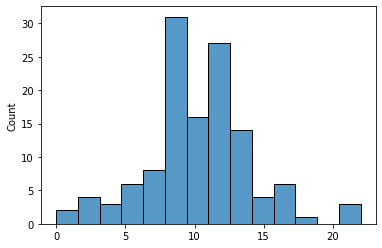

In [ ]:
deviate_ss = abs(df_transformed[QUESTION_COL] - 3).sum(axis=1)
sns.histplot(deviate_ss)

In [ ]:
neutral_idx = deviate_ss[deviate_ss < 3].index

In [ ]:
neutral_idx

Int64Index([10, 29, 77, 87, 112], dtype='int64')

In [ ]:
df_transformed.iloc[neutral_idx][QUESTION_COL]

,6,7,8,9,10,11,12,13,14,15,16,17
10,1,3,3,3,3,3,3,3,3,3,3,3
29,3,3,3,3,3,2,3,3,3,4,3,3
77,3,3,3,3,3,3,3,3,3,3,3,5
87,3,3,3,3,3,3,3,3,3,3,3,3
112,3,3,3,3,3,3,3,3,3,3,3,3


In [ ]:
df_transformed.drop(neutral_idx, inplace=True)
df_score.drop(neutral_idx, inplace=True)

#### Removing repeated answers to most questions

In [ ]:
agree_count = (df_transformed[QUESTION_COL] > 3).sum(axis=1)
disagree_count = (df_transformed[QUESTION_COL] < 3).sum(axis=1)

In [ ]:
agree_idx = agree_count[agree_count > 10].index
disagree_idx = disagree_count[disagree_count > 10].index

In [ ]:
df_transformed.loc[agree_idx][QUESTION_COL]

,6,7,8,9,10,11,12,13,14,15,16,17
19,4,4,5,4,5,5,4,5,4,4,4,4
42,5,5,5,5,5,5,4,4,5,5,5,5
43,4,4,4,4,4,4,4,4,4,4,4,4


In [ ]:
df_transformed.loc[disagree_idx][QUESTION_COL]

,6,7,8,9,10,11,12,13,14,15,16,17


Here we see that participant 19, 42 and 43 agrees on mostly all of the questions. This is known as the acquiescence bias, where the participants readily agree on what is being asked. These answers may not reflect on the participants' true perception on their time management. 

These answers will be removed.

In [ ]:
df_transformed.drop(agree_idx, inplace=True)
df_score.drop(agree_idx, inplace=True)

### Analysis

#### Comparison of scores between different categories

In [ ]:
df_score['Score'] = df_score[QUESTION_COL].sum(axis=1)

In [ ]:
df_score['Score'].describe()

count    117.000000
mean      37.470085
std        5.443396
min       26.000000
25%       34.000000
50%       38.000000
75%       41.000000
max       55.000000
Name: Score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


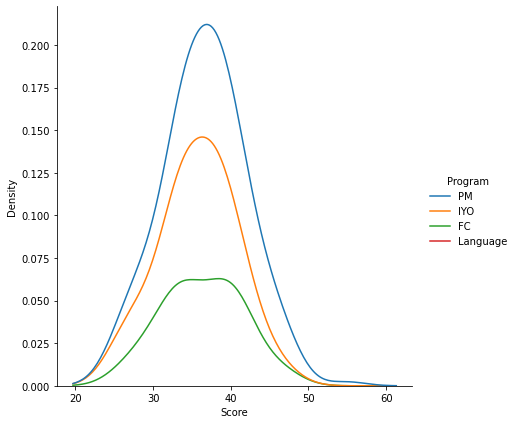

In [ ]:
sns.displot(data=df_score, x='Score', height=6, hue='Program', kind='kde', multiple='stack', common_norm=False, fill=False)

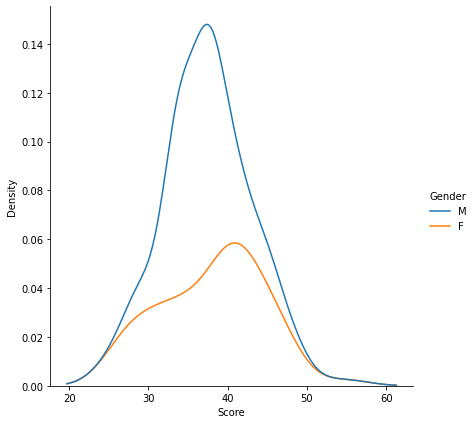

In [ ]:
sns.displot(data=df_score, x='Score', height=6, hue='Gender', kind='kde', multiple='stack', common_norm=False, fill=False)

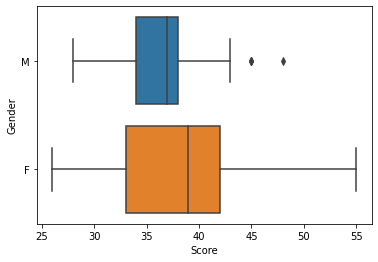

In [ ]:
sns.boxplot(data=df_score, x='Score', y='Gender')

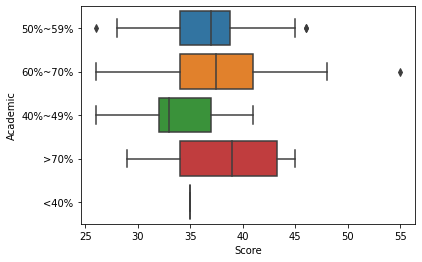

In [ ]:
sns.boxplot(data=df_score, x='Score', y='Academic')

There seems to be a score difference between genders. Let's test it out.

In [78]:
from scipy.stats import ttest_ind

gender_iter = iter(df_score.groupby('Gender'))
ttest_ind(a=next(gender_iter)[1][QUESTION_COL].sum(axis=1), 
          b=next(gender_iter)[1][QUESTION_COL].sum(axis=1),
          equal_var=False
          )

Ttest_indResult(statistic=1.198731942539171, pvalue=0.23353146529387686)

The difference is not statistically significant. However, we can still see that the female group has a higher variance compared to male.

#### Correlations between questions 

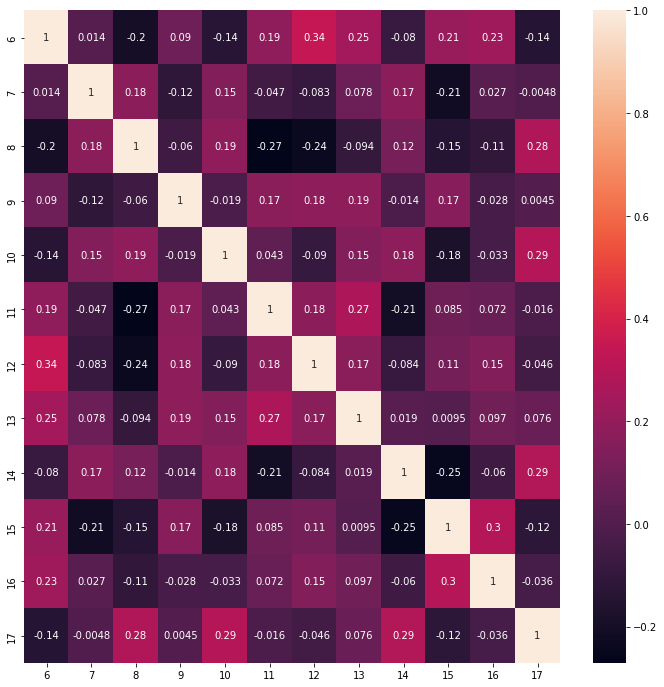

In [ ]:
corr_matrix = df_transformed[QUESTION_COL].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True)

Note that Question 6 is moderately correlated with Question 12. It means that feeling that one's life is aimless and frequently changing tasks aimlessly often goes together. 

#### Extra: Grouping

Now we group the participants into two groups, one that scores above 36 and one that scores below it. 
What is the question where the two groups' response differ the most? In other word, if we can only ask one question from the questionnaire that can best distinguish between an above average and below average group, what will it be? What is the question that is most predictive of how well one manages his/her time?

In [ ]:
df_score['Description'] = df_score['Score'] > 36
df_score['Description'] = df_score['Description'].replace([True, False], ['Above average', 'Below average'])

In [ ]:
df_above = df_score[df_score['Description'] == 'Above average'][QUESTION_COL].mean(axis=0)
df_below = df_score[df_score['Description'] == 'Below average'][QUESTION_COL].mean(axis=0)
df_above

6     3.838235
7     3.147059
8     3.852941
9     3.088235
10    3.411765
11    3.455882
12    3.264706
13    4.161765
14    3.308824
15    3.102941
16    3.147059
17    3.338235
dtype: float64

In [ ]:
df_above - df_below

6     1.164766
7     0.534814
8     0.791717
9     0.455582
10    0.575030
11    0.741597
12    0.815726
13    0.712785
14    0.655762
15    0.796819
16    0.759304
17    0.705582
dtype: float64

Question 6 is the question where the two groups' response differ the most. Let's look at it from the graph.

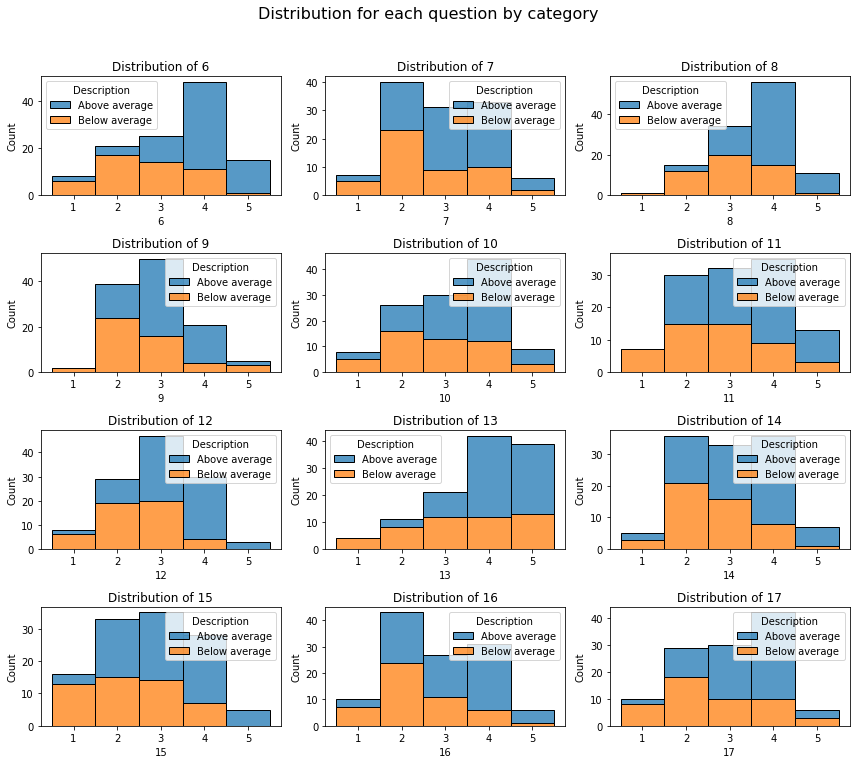

In [ ]:
plot_each_col(data=df_score, 
              col_list=QUESTION_COL, 
              plot_type='hist', 
              title='Distribution for each question by category', 
              figsize=(12, 12), 
              n_col=3, 
              discrete=True, 
              hue='Description')

From the graph, it can be clearly seen that the proportion of "above average" (group that score above 36) becomes higher as the response agrees more to the statement. If a person reports that he/she strongly agree to Question 6, it is almost 100% that he/she will perceive himself/herself as being above average in managing his/her time.

So next time if you want to know how well a person thinks he/she is good in time management, just ask Question 6!

Using similar technique, now we see how different genders affect the response to each question.

In [ ]:
df_male = df_transformed[df_transformed['Gender'] == 'M'][QUESTION_COL].mean(axis=0)
df_female = df_transformed[df_transformed['Gender'] == 'F'][QUESTION_COL].mean(axis=0)

In [ ]:
df_male - df_female

6     0.409649
7     0.286842
8    -0.229825
9    -0.028947
10   -0.264912
11    0.112281
12    0.021053
13    0.485965
14    0.001754
15    0.028947
16    0.111404
17    0.156140
dtype: float64

Question 6 and 13 are questions where different genders differ the most. Let's see the graph.

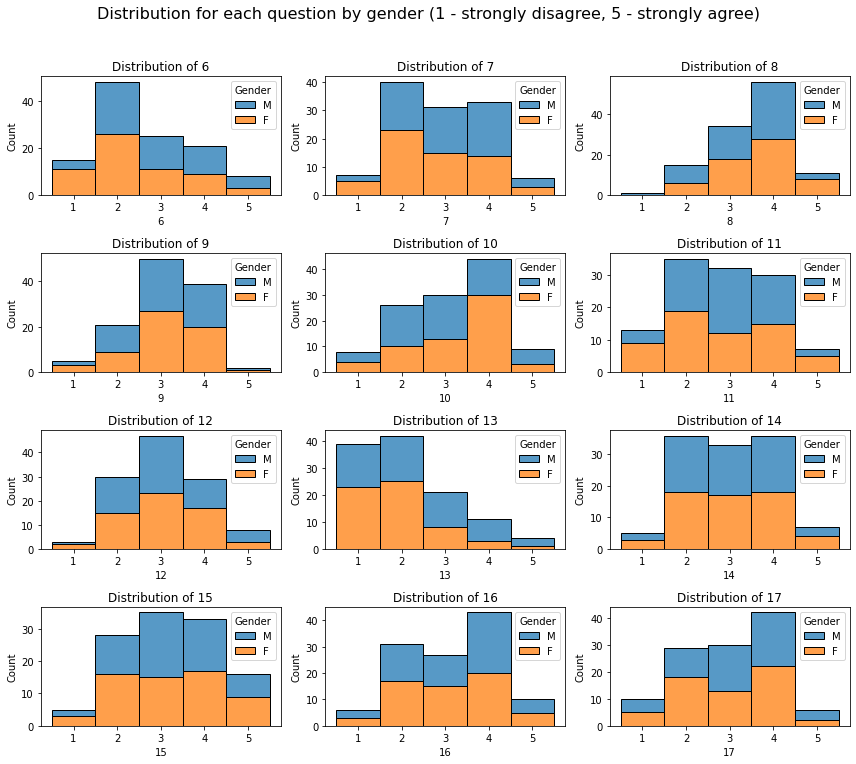

In [ ]:
plot_each_col(data=df_transformed, 
              col_list=QUESTION_COL, 
              plot_type='hist', 
              title='Distribution for each question by gender (1 - strongly disagree, 5 - strongly agree)', 
              figsize=(12, 12), 
              n_col=3, 
              discrete=True, 
              hue='Gender')

From the graph, it can be seen that men are more likely than female to answer positively to Question 6 and 13. Is the effect significant? Let's test it out with Aspin-Welch t-test.

In [ ]:
from scipy.stats import ttest_ind

ttest_ind(a = df_transformed[df_transformed['Gender'] == 'M']['6'],
          b = df_transformed[df_transformed['Gender'] == 'F']['6'],
          equal_var=False)

Ttest_indResult(statistic=1.9951535968879275, pvalue=0.048396581737650685)

In [ ]:
ttest_ind(a = df_transformed[df_transformed['Gender'] == 'M']['13'],
          b = df_transformed[df_transformed['Gender'] == 'F']['13'],
          equal_var=False)

Ttest_indResult(statistic=2.447369712822064, pvalue=0.016031769017996265)

The effects are significant at 5% significant level. Gender does affect how they response to Question 6 and 13.

#### Extra 2: Clustering

We use clustering to see whether we can reveal any interesting clusters.

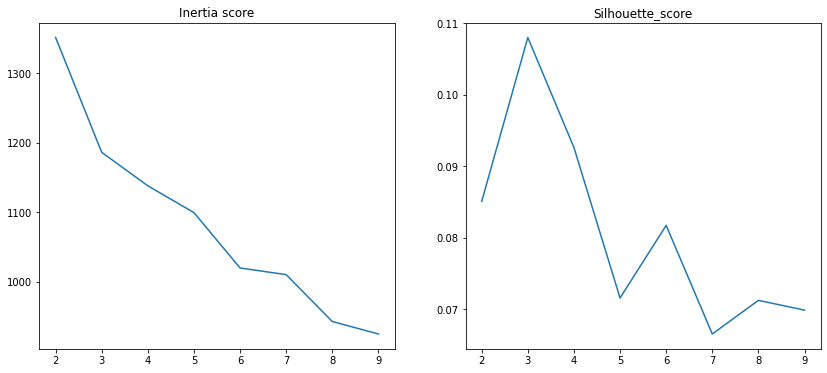

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

def choose_k(data, select_range = range(5, 51, 5), figsize=(14, 6), sample_size=None):
  plt.figure(figsize=figsize)
  inertia_list = []
  silhouette_list = []
  kmean_per_label = []
  for i in select_range:
    kmean = MiniBatchKMeans(n_clusters=i)
    kmean.fit(data)
    kmean_per_label.append(kmean)
    label = kmean.labels_
    silhouette_list.append(silhouette_score(data, label, sample_size=sample_size))
    inertia_list.append(kmean.inertia_)
  
  ax1 = plt.subplot(121)
  ax2 = plt.subplot(122)
  ax1.title.set_text('Inertia score')
  ax1.plot(select_range, inertia_list)
  ax2.title.set_text('Silhouette_score')
  ax2.plot(select_range, silhouette_list)
  return kmean_per_label

_ = choose_k(df_score[QUESTION_COL], range(2, 10))

Whether if we use the elbow method on the inertia score or select the cluster number with the highest silhouette score, we always end up with 3 clusters. So we will use 3 clusters.

In [ ]:
kmean = KMeans(n_clusters=3, random_state=512)
kmean.fit(df_score[QUESTION_COL])
kmean.cluster_centers_

array([[4.18367347, 3.06122449, 3.95918367, 3.14285714, 3.30612245,
        3.79591837, 3.44897959, 4.32653061, 3.12244898, 3.20408163,
        3.30612245, 3.26530612],
       [2.79487179, 2.94871795, 3.35897436, 2.74358974, 3.53846154,
        2.66666667, 2.48717949, 3.1025641 , 3.43589744, 2.71794872,
        2.48717949, 3.58974359],
       [2.68965517, 2.65517241, 3.        , 2.68965517, 2.44827586,
        2.68965517, 2.62068966, 4.10344828, 2.34482759, 2.10344828,
        2.48275862, 1.93103448]])

From the cluster centers, it is hard to see any interesting differences between different clusters. So let's plot a graph and see.

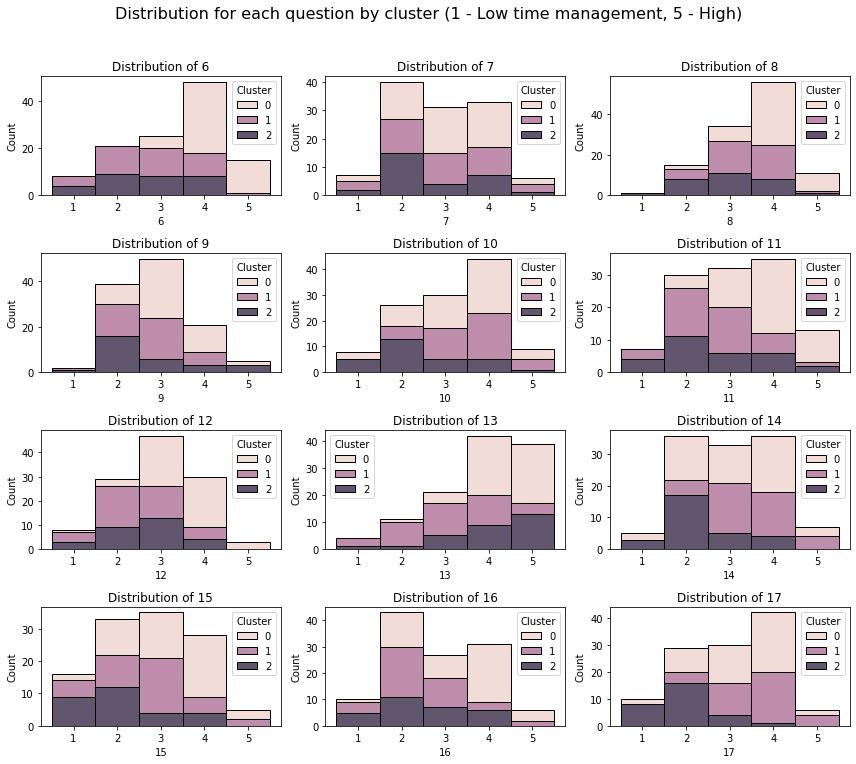

In [ ]:
df_score['Cluster'] = np.argmin(kmean.transform(df_score[QUESTION_COL]), axis=1)
plot_each_col(data=df_score, 
              col_list=QUESTION_COL, 
              plot_type='hist', 
              title='Distribution for each question by cluster (1 - Low time management, 5 - High)', 
              figsize=(12, 12), 
              n_col=3, 
              discrete=True, 
              hue='Cluster')